 **Designing Proportional, Proportional Integral and Proportional Integral Differential Controllers**

**Brief Introduction**
<br>
In electrical furnaces, temperature control is done using a thermocouple which detects temperature with a controller like proportional controller, PI controller, PD controller or PID controller

The transfer function of our plant system has been taken to be **G(s)=1/(s^2+10s+20)**. Its open loop step response has been plotted below

In [ ]:
#importing suitable libraries from matlab and signal processing to complete the task
from numpy import min
from scipy import linspace
from scipy.signal import lti, step2
from matplotlib import pyplot as plt
import control.matlab as mtl

In [ ]:
#A function is defined to plot the step responses of transfer functions after applying controllers
TP,MP,TS=[],[],[]
def func(k):
  tf = lti(   # linear, time-invariant system, rational transfer function
      list(k[0][0][0]),
      list(k[1][0][0]),
  )

  t, y = step2(tf)
  #print(t,y)
  plt.plot(t, y)
  plt.title('Step Response')
  plt.grid()
  plt.xlabel('time (s)')
  plt.ylabel('y(t)')

  #info = "OS: %f%s"%(round((y.max()/y[-1]-1)*100,2),'%')
  info="Mp: %f" % (y.max())

  try:
      Ts = round(t[next(len(y)-i for i in range(2,len(y)-1) if abs(y[-i]/y[-1])<0.98)]-t[0],2)
  except StopIteration:
      Ts = "unknown"

  try:
      Tp = round(t[next(len(y)-i for i in range(2,len(y)-1) if y[-i] == y.max())]-t[0],2)
  except StopIteration:
      Tp = "unknown"
  info +="\nTp: %s"%(Tp)
  info +="\nTs: %s"%(Ts)
  Mp=y.max()
  TP.append(Tp)
  TS.append(Ts)
  MP.append(Mp)
  print(info)   # print legend data to stdout as well
  plt.legend([info], loc=4)

  plt.show()    # display the step response graph

Overall transfer function after considering feedback and without applying any controller is G(s)= 
       1
---------------
s^2 + 10 s + 20

num_coef= [1]
den_coef= [1, 10, 20]



Now the plot of open loop transfer function without applying controller is shown with values
Mp: 0.049926
Tp: unknown
Ts: 1.56


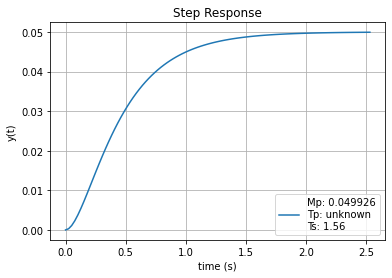

In [ ]:
#Here G is same as our plant system i.e-G(s)
G=mtl.tf([1],
    [1,10,20])
print('Overall transfer function after considering feedback and without applying any controller is G(s)=',G)
k=mtl.tfdata(G)
print('num_coef=',list(k[0][0][0]))
print('den_coef=',list(k[1][0][0]))
print("\n\n")
print("Now the plot of open loop transfer function without applying controller is shown with values")
#calling the function to plot step response after using proportional controller
func(k)

**In below diagrams closed loop responses of the system with controllers is plotted**

# **Proportional Control**
<br>

In a controller, with proportional control action, there is a continuous relationship between the output of the controller (M) (Manipulated Variable) and Actuating Error Signal E (deviation). 





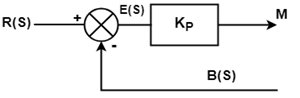

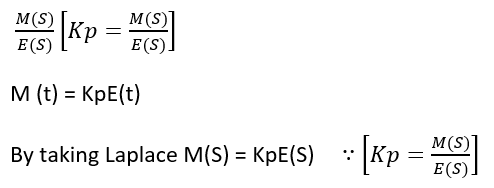

# **Integral Control**

<br>
In a controller, with integral control action, the output of the controller is changed at a rate which is proportional to the actuating error signal. E (t)

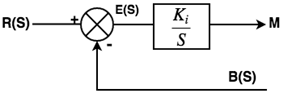

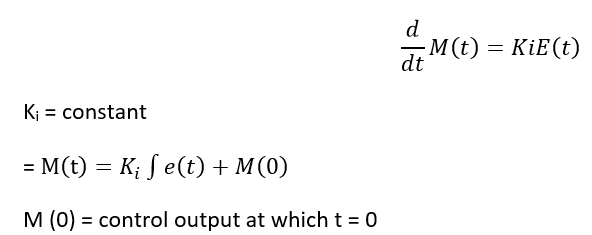

# Derivative **Control** 
<br>

In controller with derivative control action the output of the controller depends on the rate of change of the e(t)


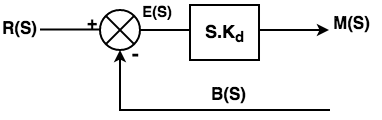

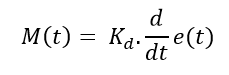

# **Now the controllers which are depicted below are a combination of one or more controls described above**

Overall transfer function after considering feedback and applying proportional controller is G(s)*R(s)/(1+G(s)*R(s))= 
      50
---------------
s^2 + 10 s + 70

num_coef= [50.0]
den_coef= [1.0, 10.0, 70.0]



Now the plot of transfer function after applying controller is shown with values
Mp: 0.782974
Tp: 0.47
Ts: 0.31


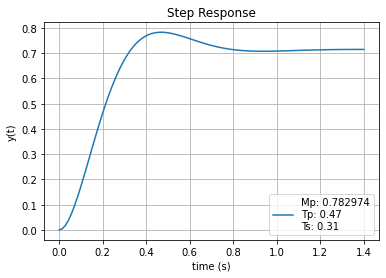

In [ ]:
#Proportional Controller
kp=50
R = mtl.tf([kp],
    [1])
a=mtl.feedback(G*R)
print('Overall transfer function after considering feedback and applying proportional controller is G(s)*R(s)/(1+G(s)*R(s))=',a)
#Now I desire numerator and denominator of this transfer function
k=mtl.tfdata(a)
print('num_coef=',list(k[0][0][0]))
print('den_coef=',list(k[1][0][0]))
print("\n\n")
print("Now the plot of transfer function after applying controller is shown with values")
#calling the function to plot step response after using proportional controller
func(k)

***The above plot shows that the proportional controller reduced both the rise time and the steady-state error, increased the overshoot, and decreased the settling time by a some amount and this is what we expected.***

Overall transfer function after considering feedback and applying PD CONTROLLER is G(s)*R(s)/(1+G(s)*R(s))= 
   20 s + 350
----------------
s^2 + 30 s + 370

num_coef= [20.0, 350.0]
den_coef= [1.0, 30.0, 370.0]



Now the plot of transfer function after applying controller is shown with values
Mp: 1.018725
Tp: 0.15
Ts: 0.08


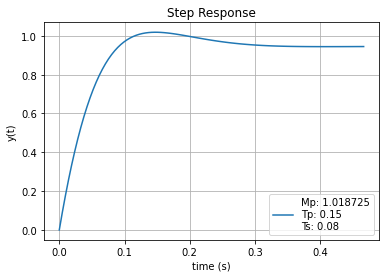

In [ ]:
#PD CONTROLLER
kp=350
kd=20
R = mtl.tf([kd,kp],
    [1])
a=mtl.feedback(G*R)
print('Overall transfer function after considering feedback and applying PD CONTROLLER is G(s)*R(s)/(1+G(s)*R(s))=',a)
#Now I desire numerator and denominator of this transfer function
k=mtl.tfdata(a)
print('num_coef=',list(k[0][0][0]))
print('den_coef=',list(k[1][0][0]))
print("\n\n")
print("Now the plot of transfer function after applying controller is shown with values")
func(k)

***This plot shows that the addition of the derivative term in our controller reduced both the overshoot and the settling time, and had a negligible effect on the rise time and the steady-state error and this is what was expected.***

Overall transfer function after considering feedback and applying PI Controller is 
        30 s + 70
------------------------
s^3 + 10 s^2 + 50 s + 70

num_coef= [30.0, 70.0]
den_coef= [1.0, 10.0, 50.0, 70.0]



Now the plot of transfer function after applying controller is shown with values
Mp: 1.012603
Tp: 0.81
Ts: 0.61


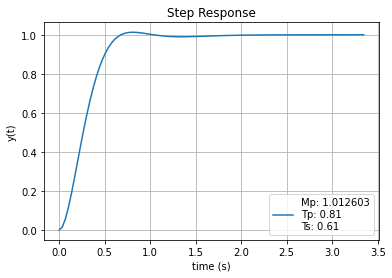

In [ ]:
#PI CONTROLLER
kp=30
ki=70
R = mtl.tf([kp,ki],
    [1,0])
a=mtl.feedback(G*R)
print('Overall transfer function after considering feedback and applying PI Controller is',a)
#Now I desire numerator and denominator of this transfer function
k=mtl.tfdata(a)
print('num_coef=',list(k[0][0][0]))
print('den_coef=',list(k[1][0][0]))
print("\n\n")
print("Now the plot of transfer function after applying controller is shown with values")
func(k)

***The above plot shows that the integral controller also reduces the rise time and increases the overshoot as the proportional controller does. The above response also shows that the integral controller eliminated the steady-state error in this case.***

Overall transfer function after considering feedback and applying PID Controller is 
   50 s^2 + 350 s + 300
--------------------------
s^3 + 60 s^2 + 370 s + 300

num_coef= [50.0, 350.0, 300.0]
den_coef= [1.0, 60.0, 370.0, 300.0]



Now the plot of transfer function after applying controller is shown with values
Mp: 0.999959
Tp: unknown
Ts: 0.81


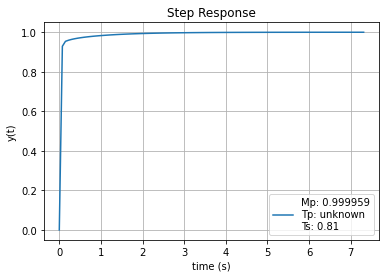

In [ ]:
#PID CONTROLLER
kp=350
ki=300
kd=50
R = mtl.tf([kd,kp,ki],
    [1,0])
a=mtl.feedback(G*R)
print('Overall transfer function after considering feedback and applying PID Controller is',a)
#Now I desire numerator and denominator of this transfer function
k=mtl.tfdata(a)
print('num_coef=',list(k[0][0][0]))
print('den_coef=',list(k[1][0][0]))
print("\n\n")
print("Now the plot of transfer function after applying controller is shown with values")
func(k)

***So in the last PID controller has been used and its a closed-loop system with no overshoot, fast rise time, and no steady-state error. This output is the best among all other controllers***

In [ ]:
#creating a dataframe to show final results for all controllers  
from IPython.display import display
import pandas as pd
 # intialise data of lists.
data = {'Category':['Without_controller', 'Proportional Controller','PD Controller', 'PI Controller', 'PID Controller'],
        'Peak Time':TP,
        'Maximum Overshoot':MP,
        'Settling Time':TS}
df = pd.DataFrame(data)
 
# Print the output.
display(df)        

,Category,Peak Time,Maximum Overshoot,Settling Time
0,Without_controller,unknown,0.049926,1.56
1,Proportional Controller,0.47,0.782974,0.31
2,PD Controller,0.15,1.018725,0.08
3,PI Controller,0.81,1.012603,0.61
4,PID Controller,unknown,0.999959,0.81
